In [3]:
import pandas as pd 
import yfinance as yf
import numpy as np

df = yf.download('ITMG.JK', 
                 start='2015-01-01', 
                 end='2020-08-31', 
                 auto_adjust=False,
                 progress=False)

# keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# calculate simple returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

# remove redundant data
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

df.head()

,log_rtn
Date,
2015-01-05,-0.025479
2015-01-06,-0.061532
2015-01-07,-0.008613
2015-01-08,0.001729
2015-01-09,0.058692


In [10]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
# plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
import pandas as pd 

def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [12]:
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)
df_rv.rv = df_rv.rv * np.sqrt(12)

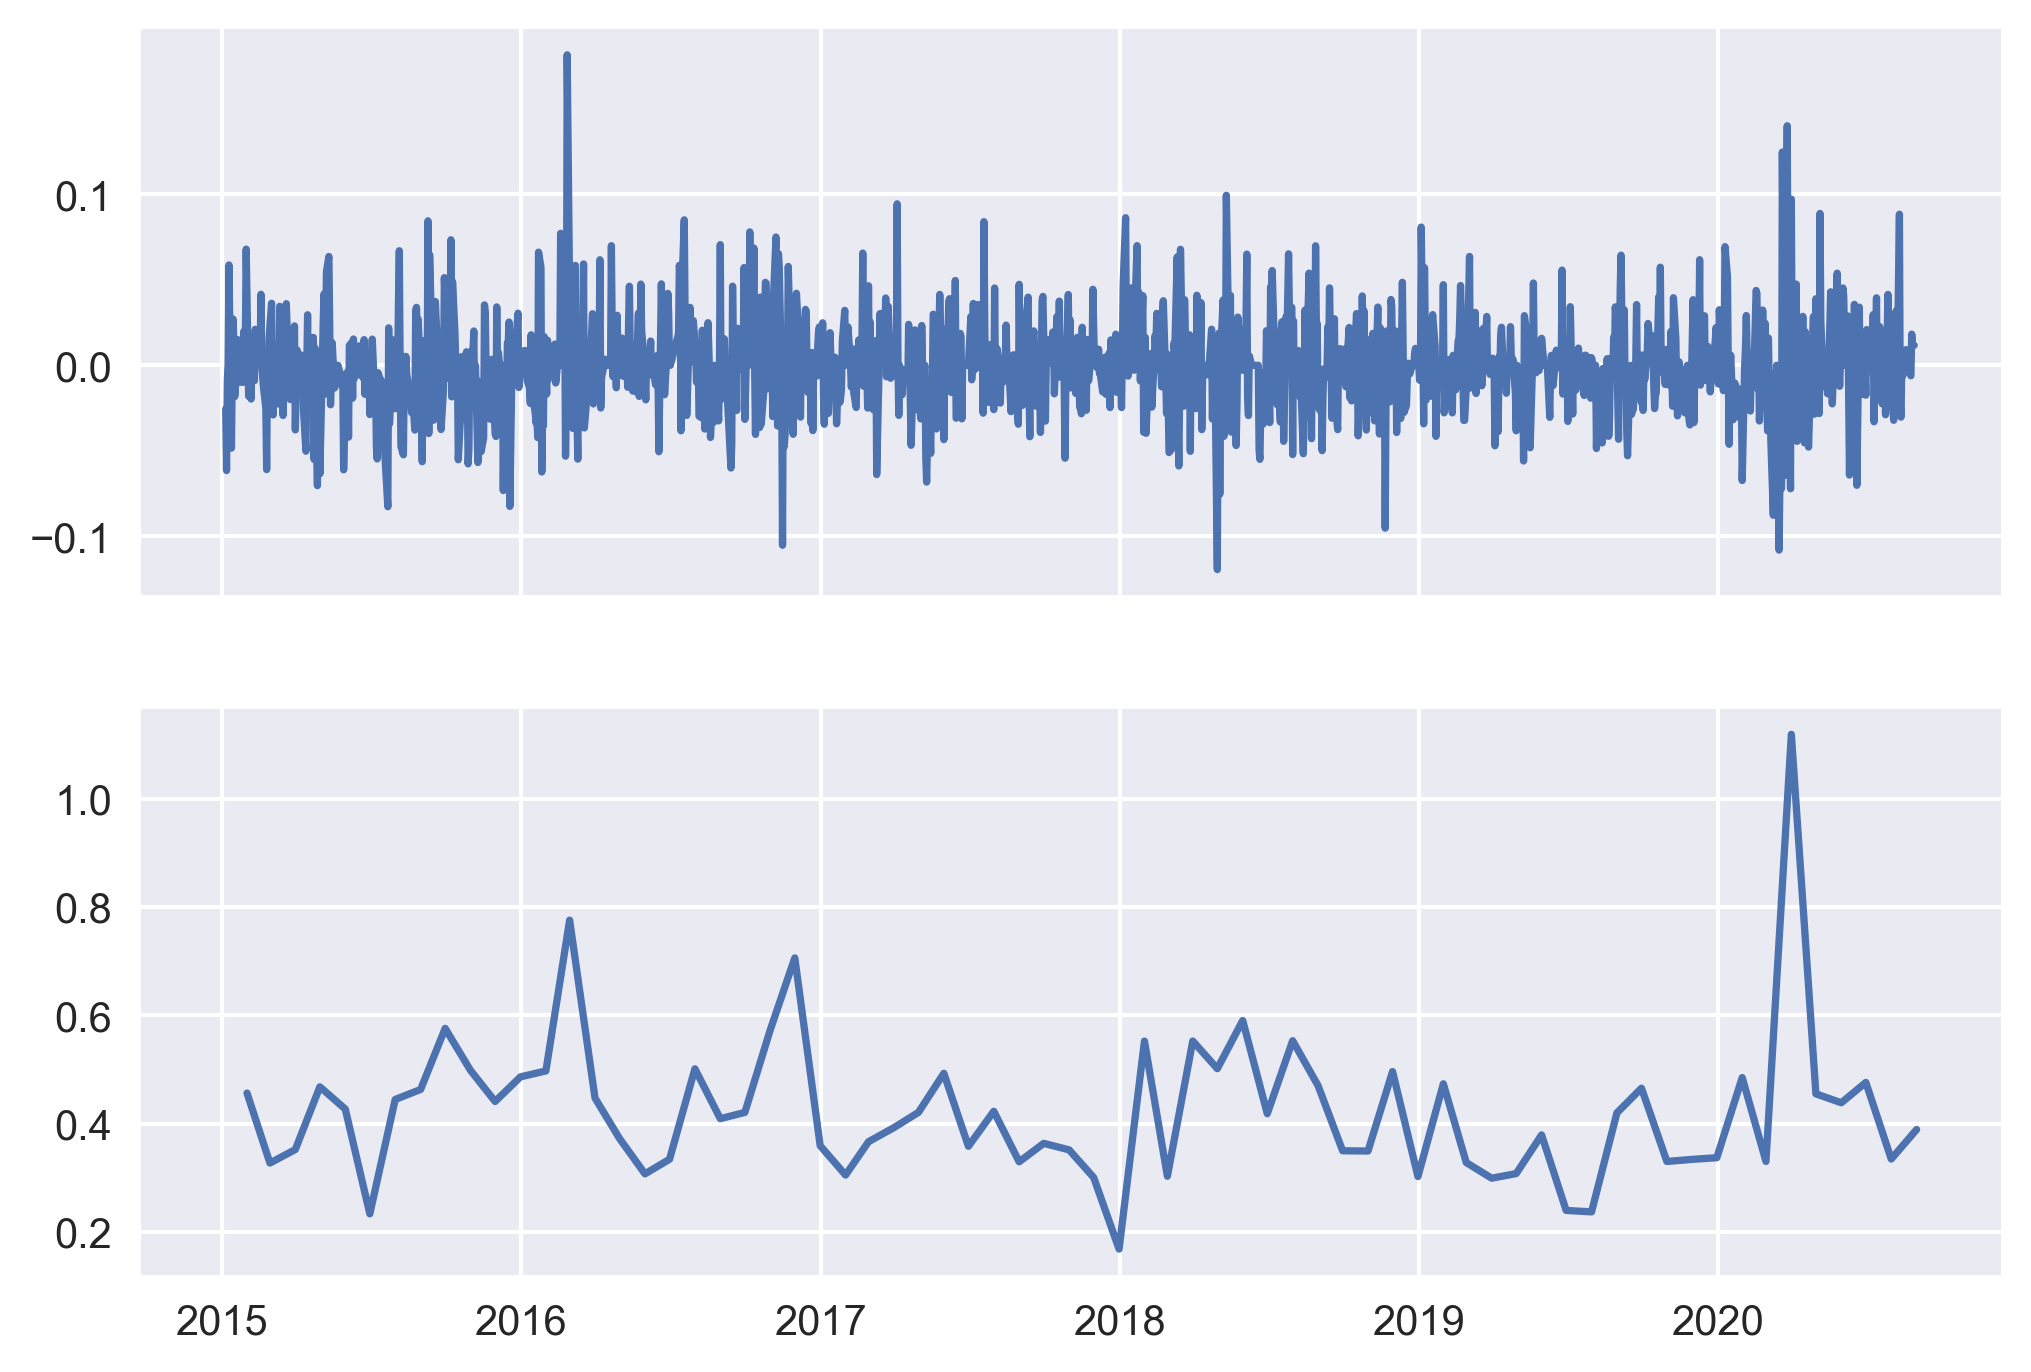

In [13]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[1].plot(df_rv)

plt.show()